In [1]:
## Imports

In [2]:
import numpy as np
import pandas as pd
import secrets
from secrets import IEX_CLOUD_API_TOKEN
import math
import requests
from nsetools import Nse
from pprint import pprint

In [3]:
data_nifty=pd.read_csv("ind_nifty50list.csv")
symbols=[i for i in data_nifty.Symbol]
symbols

['ADANIENT',
 'ADANIPORTS',
 'APOLLOHOSP',
 'ASIANPAINT',
 'AXISBANK',
 'BAJAJ-AUTO',
 'BAJFINANCE',
 'BAJAJFINSV',
 'BPCL',
 'BHARTIARTL',
 'BRITANNIA',
 'CIPLA',
 'COALINDIA',
 'DIVISLAB',
 'DRREDDY',
 'EICHERMOT',
 'GRASIM',
 'HCLTECH',
 'HDFCBANK',
 'HDFCLIFE',
 'HEROMOTOCO',
 'HINDALCO',
 'HINDUNILVR',
 'ICICIBANK',
 'ITC',
 'INDUSINDBK',
 'INFY',
 'JSWSTEEL',
 'KOTAKBANK',
 'LTIM',
 'LT',
 'M&M',
 'MARUTI',
 'NTPC',
 'NESTLEIND',
 'ONGC',
 'POWERGRID',
 'RELIANCE',
 'SBILIFE',
 'SHRIRAMFIN',
 'SBIN',
 'SUNPHARMA',
 'TCS',
 'TATACONSUM',
 'TATAMOTORS',
 'TATASTEEL',
 'TECHM',
 'TITAN',
 'ULTRACEMCO',
 'WIPRO']

In [4]:
import requests

url = "https://latest-stock-price.p.rapidapi.com/any"

headers = {
	"X-RapidAPI-Key": "ad8e39827emsh4ea89255472dd78p149f41jsn8c79f4d9c7ff",
	"X-RapidAPI-Host": "latest-stock-price.p.rapidapi.com"
}

response = requests.get(url, headers=headers)

data=response.json()

In [5]:
Nifty50_data=[]
for symbol in symbols:
    for i in range(len(data)):
        if symbol==data[i]['symbol']:
            Nifty50_data.append(data[i])
Nifty50_data
    

[{'identifier': 'ADANIENTEQN',
  'change': 50.25,
  'dayHigh': 3175,
  'dayLow': 3034.5,
  'lastPrice': 3110,
  'lastUpdateTime': '21-May-2024 15:59:15',
  'meta': {'companyName': 'Adani Enterprises Limited',
   'industry': 'TRADING',
   'isin': 'INE423A01024'},
  'open': 3067.9,
  'pChange': 1.64,
  'perChange30d': 1.08,
  'perChange365d': 56.42,
  'previousClose': 3059.75,
  'symbol': 'ADANIENT',
  'totalTradedValue': 9657477051.48,
  'totalTradedVolume': 3091659,
  'yearHigh': 3350,
  'yearLow': 1872.1},
 {'identifier': 'ADANIPORTSEQN',
  'change': 42.35,
  'dayHigh': 1398.8,
  'dayLow': 1333,
  'lastPrice': 1382.55,
  'lastUpdateTime': '21-May-2024 15:59:52',
  'meta': {'companyName': 'Adani Ports and Special Economic Zone Limited',
   'industry': 'SHIPPING',
   'isin': 'INE742F01042'},
  'open': 1344,
  'pChange': 3.16,
  'perChange30d': 2.31,
  'perChange365d': 94.77,
  'previousClose': 1340.2,
  'symbol': 'ADANIPORTS',
  'totalTradedValue': 5772980362.74,
  'totalTradedVolume': 

In [27]:
my_columns = ['CompanyName','Ticker','industry', 'Price', 'Shares_to_Buy']
Final_data=pd.DataFrame(columns=my_columns)
Final_data

,CompanyName,Ticker,industry,Price,Shares_to_Buy


In [51]:
Top_50=50
for i in range(1,Top_50):
    Final_data=Final_data.append(
                                pd.Series([Nifty50_data[i]['meta']['companyName'],
                                              Nifty50_data[i]['symbol'],
                                              Nifty50_data[i]['meta']['industry'],
                                              Nifty50_data[i]['lastPrice'],
                                           'N/A'],
                                          index=my_columns),
                                          ignore_index=True )

TypeError: append() got an unexpected keyword argument 'ignore_warning'

In [29]:
Final_data

,CompanyName,Ticker,industry,Price,Shares_to_Buy
0,Adani Ports and Special Economic Zone Limited,ADANIPORTS,SHIPPING,1382.55,N/A
1,Apollo Hospitals Enterprise Limited,APOLLOHOSP,MISCELLANEOUS,5932.3,N/A
2,Asian Paints Limited,ASIANPAINT,PAINTS,2846,N/A
3,Axis Bank Limited,AXISBANK,BANKS,1137.7,N/A
4,Bajaj Auto Limited,BAJAJ-AUTO,AUTOMOBILES - 2 AND 3 WHEELERS,8800,N/A
5,Bajaj Finance Limited,BAJFINANCE,FINANCE,6755,N/A
6,Bajaj Finserv Limited,BAJAJFINSV,FINANCE,1581,N/A
7,Bharat Petroleum Corporation Limited,BPCL,REFINERIES,645,N/A
8,Bharti Airtel Limited,BHARTIARTL,TELECOMMUNICATION - SERVICES,1338.7,N/A
9,Britannia Industries Limited,BRITANNIA,FOOD AND FOOD PROCESSING,5191,N/A


In [9]:
## Distributing stocks on equal weights [Stratergy 1]

In [30]:
##Geting user portfolio size

portfolio_size=int(input("Enter Portfolio size\n"))


Enter Portfolio size
100000


In [31]:
position_to_be_purchased=abs(portfolio_size//len(Final_data))
position_to_be_purchased

2040

In [32]:
for i in range(len(Final_data.Ticker)):
    Final_data.loc[i,'Shares_to_Buy']=int(position_to_be_purchased//Final_data.loc[i,'Price'])

In [33]:
Final_data

,CompanyName,Ticker,industry,Price,Shares_to_Buy
0,Adani Ports and Special Economic Zone Limited,ADANIPORTS,SHIPPING,1382.55,1
1,Apollo Hospitals Enterprise Limited,APOLLOHOSP,MISCELLANEOUS,5932.3,0
2,Asian Paints Limited,ASIANPAINT,PAINTS,2846,0
3,Axis Bank Limited,AXISBANK,BANKS,1137.7,1
4,Bajaj Auto Limited,BAJAJ-AUTO,AUTOMOBILES - 2 AND 3 WHEELERS,8800,0
5,Bajaj Finance Limited,BAJFINANCE,FINANCE,6755,0
6,Bajaj Finserv Limited,BAJAJFINSV,FINANCE,1581,1
7,Bharat Petroleum Corporation Limited,BPCL,REFINERIES,645,3
8,Bharti Airtel Limited,BHARTIARTL,TELECOMMUNICATION - SERVICES,1338.7,1
9,Britannia Industries Limited,BRITANNIA,FOOD AND FOOD PROCESSING,5191,0


## Buiding a portfolio analyzer

In [48]:
import matplotlib.pyplot as plt

industry=[i for i in Final_data.industry]
shares=[i for i in Final_data.Shares_to_Buy]

plot={}

for i in range(len(industry)):
    if industry[i] in plot:
        plot[industry[i]]+=shares[i]
    plot[industry[i]]=shares[i]


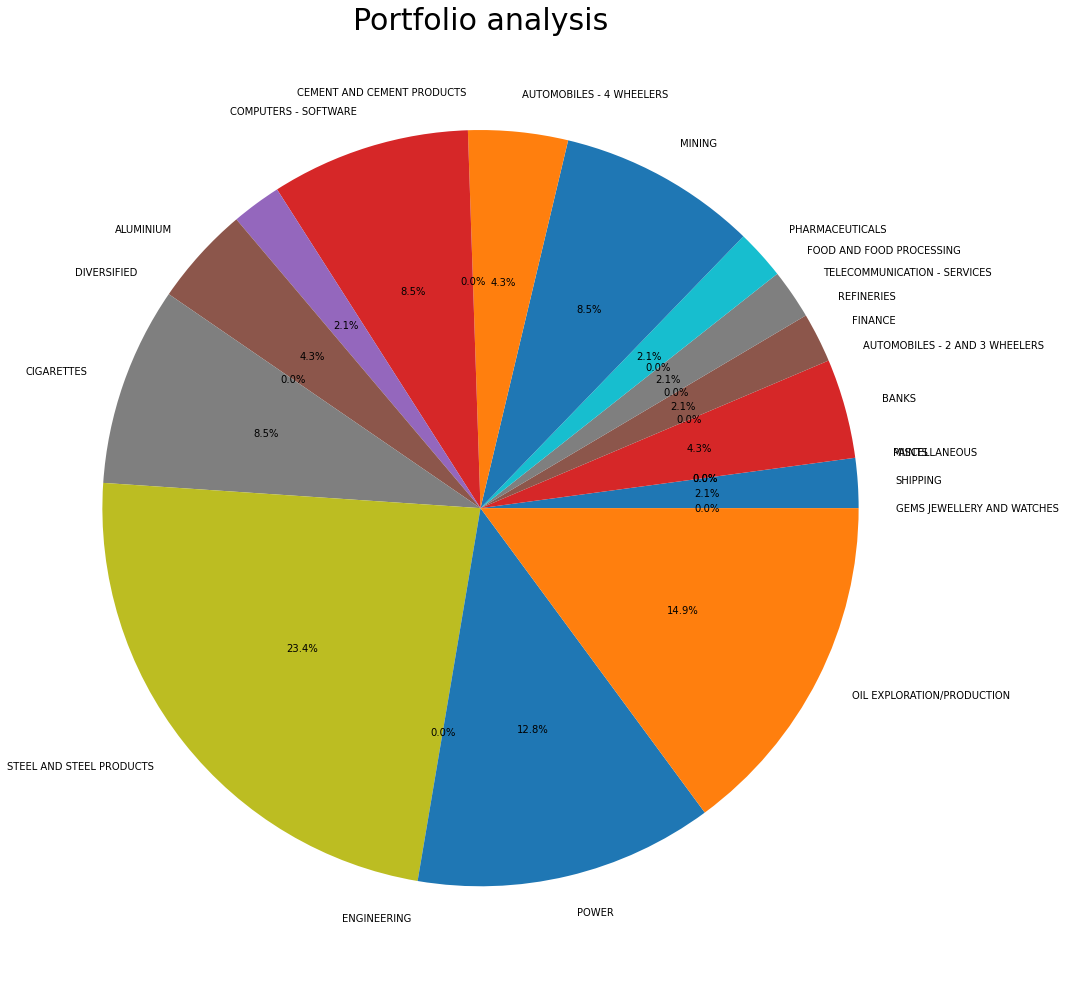

In [46]:

fig, ax = plt.subplots(figsize=(15,15))
ax.pie(plot.values(), labels=plot.keys(),autopct='%.1f%%')
ax.set_title('Portfolio analysis',fontsize=30)
plt.tight_layout()

## Exprorting data into Excel sheet

In [50]:
file_name = 'EqualWeight_Nifty50.xlsx'
 
# saving the excel

Final_data.to_excel(file_name)

In [ ]:
import requests

url = "https://real-time-finance-data.p.rapidapi.com/search"

querystring = {"query":"Apple","language":"en"}

headers = {
	"X-RapidAPI-Key": "ad8e39827emsh4ea89255472dd78p149f41jsn8c79f4d9c7ff",
	"X-RapidAPI-Host": "real-time-finance-data.p.rapidapi.com"
}

response = requests.get(url, headers=headers, params=querystring)

print(response.json())